# **Image classification using Vision Transformers**

Image classification is the canonical computer vision task of determining if an image contains a specific object, feature, or activity.

This notebook demonstrates image classification using Vision Transformers. This demonstration uses Data-efficient Image Transformers DeiT pretrained on ImageNet for image classification.


# **What is DeiT?**
Convolutional Neural Networks (CNNs) have been the main models for image classification since deep learning took off in 2012, but CNNs typically require hundreds of millions of images for training to achieve the SOTA results. DeiT is a vision transformer model that requires a lot less data and computing resources for training to compete with the leading CNNs in performing image classification, which is made possible by two key components of of DeiT:

Data augmentation that simulates training on a much larger dataset;

Native distillation that allows the transformer network to learn from a CNN’s output.

DeiT shows that Transformers can be successfully applied to computer vision tasks, with limited access to data and resources. For more details on DeiT, see the <a href="https://github.com/facebookresearch/deit" name="cell-id">repo</a> and <a href="https://arxiv.org/abs/2012.12877" name="cell-id">paper</a>.



# Initialization

In [3]:
import os
from PIL import Image
import torch
import json
import requests
import zipfile
from io import BytesIO
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

I have downloaded the checkpoint, a test image and the ImageNet json file and stored them in my AWS S3 bucket.

You do not have to download or worry about any file dependency to run the inference. I got you covered!

The next part of the pipeline downloads a zip file from my S3 bucket which will contain the checkpoint, a test image and a json file of ImageNet classes.

The zip file will be downloaded, extracted and stored in the current directory. This is designed to be as generic as possible. Feel free to change the paths to checkpoint_path, classes_path and image_path based on the environment you are running this code in.

In [4]:
url = "https://open-source-storage.s3.us-west-1.amazonaws.com/transformer_classification.zip"
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall('./')
print("Model files extracted successfully.")

Model files extracted successfully.


In [5]:
checkpoint_path = './transformer_classification/checkpoints/checkpoint.pth'
classes_path = './transformer_classification/utils/imagenet_class_index.json'
image_path = './transformer_classification/media/banana.jpeg'

# Load the model

In [6]:
if os.path.exists(checkpoint_path):
  model = torch.load(checkpoint_path)
else:
  raise FileNotFoundError(f"Checkpoint file not found: {checkpoint_path}")

# Load ImageNet classes

In [7]:
if os.path.exists(classes_path):
    with open(classes_path, 'r') as f:
        classes = json.load(f)
else:
    raise FileNotFoundError(f"Classes file not found: {classes_path}")

# Load test image and perform transformations

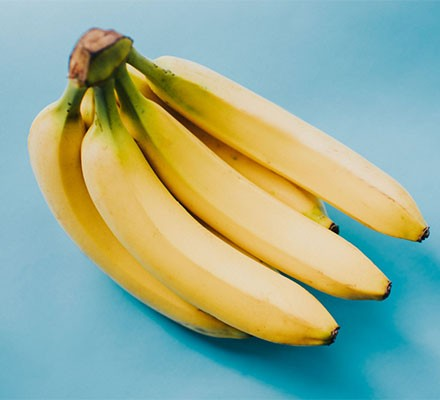

In [8]:
transform = transforms.Compose([
            transforms.Resize(256, interpolation=3),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD),
        ])

im = Image.open(image_path)
im_copy = im.copy()
display(im_copy)
im = transform(im)[None,]


# Perform inference on the test image

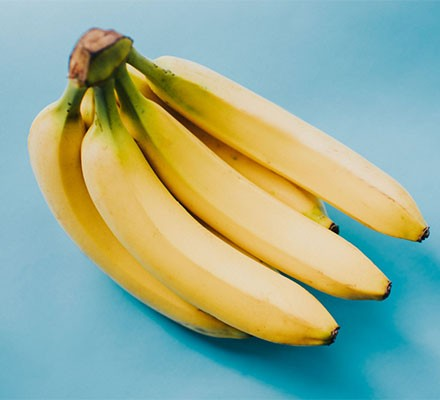

954 banana


In [9]:
out = model(im)
clsidx = torch.argmax(out)
display(im_copy)
print(clsidx.item(), classes[str(clsidx.item())][1])